In [1]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
import matplotlib.pyplot as plt

In [4]:
tcs_stock = yf('TCS.NS', result_range='5y', interval='1d', dropna='True').result
tcs_stock

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\yahoo_finance_api-0.0.1-py3.6.egg\yahoo_finance_api\__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,Open,High,Low,Close,Volume
2015-09-11 09:15:00,1273.25,1284.20,1270.30,1276.00,1592672.0
2015-09-14 09:15:00,1282.50,1282.50,1271.50,1275.82,1589318.0
2015-09-15 09:15:00,1275.82,1279.45,1268.00,1268.62,1379900.0
2015-09-16 09:15:00,1277.50,1282.50,1270.53,1275.18,1756816.0
2015-09-18 09:15:00,1282.50,1293.00,1269.50,1275.62,2455294.0
...,...,...,...,...,...
2020-09-07 09:15:00,2289.00,2343.50,2283.35,2327.05,4620401.0
2020-09-08 09:15:00,2335.95,2390.45,2327.05,2348.20,7453998.0
2020-09-09 09:15:00,2325.00,2359.00,2320.00,2327.65,3866535.0
2020-09-10 09:15:00,2335.00,2348.50,2324.30,2331.15,2308813.0


### Rolling Mean and Return Rate of Stocks

##### Rolling Mean

Rolling mean/Moving Average(MA) smooths out the price data by creating a constantly updated average price. 

In [28]:
closing_price_df = tcs_stock['Close']
rolling_mean_close_price = closing_price_df.rolling(window = 100).mean()
rolling_mean_close_price

2015-09-11 09:15:00          NaN
2015-09-14 09:15:00          NaN
2015-09-15 09:15:00          NaN
2015-09-16 09:15:00          NaN
2015-09-18 09:15:00          NaN
                         ...    
2020-09-07 09:15:00    2105.5375
2020-09-08 09:15:00    2110.9575
2020-09-09 09:15:00    2116.0475
2020-09-10 09:15:00    2121.9825
2020-09-11 15:29:59    2128.0285
Name: Close, Length: 1229, dtype: float64

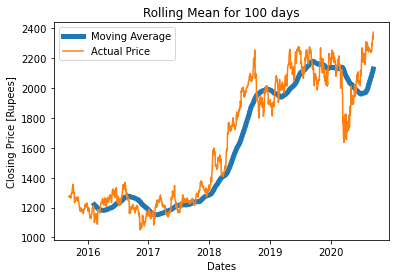

In [29]:
plt.plot(rolling_mean_close_price, linewidth = 5)
plt.plot(closing_price_df)
plt.legend(['Moving Average', 'Actual Price'])
plt.xlabel('Dates')
plt.ylabel('Closing Price [Rupees]')
plt.title('Rolling Mean for 100 days')
plt.show()

The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn.

##### Return Deviation — to determine risk and return

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.

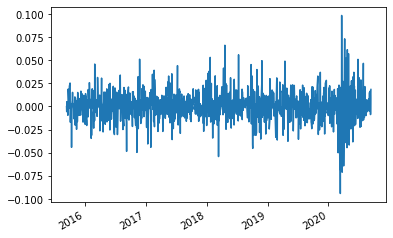

In [31]:
returns = (closing_price_df / (closing_price_df.shift(periods = 1))) - 1

returns.plot()

In this chart, we look for stability and good positive returns, it can be seen in 2020 it has given the worst and best possible returns, hence this stock may not be termed as stable, but this is highly subjective.


### Check Performance with competitors

In [32]:
stock_symbols = ['TCS.NS', 'RELIANCE.NS', 'GAIL.NS', 'MARUTI.NS', 'BAJAJ-AUTO.NS', 
                 'ASIANPAINT.NS', 'GSKCONS.NS', 'DIAMINESQ.BO', 'SWISSGLA.BO', 'IOLCP.NS',
                 'CALCOM.BO']

my_stocks = pd.DataFrame()
for i in range(len(stock_symbols)):
    my_stocks[stock_symbols[i]] = yf(stock_symbols[i], result_range='5y', interval='1d', dropna='True').result['Close']
my_stocks

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\yahoo_finance_api-0.0.1-py3.6.egg\yahoo_finance_api\__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
2015-09-11 09:15:00,1276.00,430.48,80.20,4317.75,2325.80,816.15,6110.65,30.85,90.30,72.15,2.97
2015-09-14 09:15:00,1275.82,431.92,81.96,4319.50,2314.35,840.25,6154.60,30.00,89.10,73.30,3.11
2015-09-15 09:15:00,1268.62,433.50,81.56,4325.00,2296.40,831.10,6172.00,30.00,91.00,72.50,3.11
2015-09-16 09:15:00,1275.18,436.27,82.41,4355.60,2350.15,823.95,6125.45,30.05,91.95,71.05,3.20
2015-09-18 09:15:00,1275.62,447.70,80.79,4400.85,2297.50,841.05,6100.45,30.05,88.00,71.90,3.20
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-07 09:15:00,2327.05,2082.65,95.75,7209.15,2898.20,1982.10,10732.60,455.25,1704.40,733.35,25.00
2020-09-08 09:15:00,2348.20,2107.10,94.55,7224.00,2901.75,1960.35,10732.60,433.60,1658.40,749.45,24.10
2020-09-09 09:15:00,2327.65,2161.35,91.05,7215.25,2910.15,1979.05,10732.60,421.90,1716.35,725.15,24.30
2020-09-10 09:15:00,2331.15,2314.00,90.80,7231.65,2914.70,2056.55,10732.60,447.85,1694.30,731.05,24.10


* Below the percentage change calculates the change in percentage from previous value.
* Correlation gives the value of either positive or negative correlation

In [34]:
percentage_change = my_stocks.pct_change()
correlation = percentage_change.corr()
correlation

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
TCS.NS,1.000000,0.251580,0.158487,0.243767,0.240870,0.170875,0.222738,0.104875,0.057096,0.057267,-0.011354
RELIANCE.NS,0.251580,1.000000,0.307958,0.410463,0.333201,0.360630,0.265734,0.225144,0.082338,0.172878,0.078499
GAIL.NS,0.158487,0.307958,1.000000,0.262807,0.268523,0.237043,0.156859,0.201814,0.113005,0.131806,0.078221
MARUTI.NS,0.243767,0.410463,0.262807,1.000000,0.496856,0.455887,0.265961,0.251493,0.090184,0.211593,-0.021152
BAJAJ-AUTO.NS,0.240870,0.333201,0.268523,0.496856,1.000000,0.351691,0.232455,0.188730,0.104530,0.182948,0.025647
ASIANPAINT.NS,0.170875,0.360630,0.237043,0.455887,0.351691,1.000000,0.321108,0.153513,0.070396,0.148523,-0.037168
GSKCONS.NS,0.222738,0.265734,0.156859,0.265961,0.232455,0.321108,1.000000,0.131172,-0.000300,0.046900,-0.061157
DIAMINESQ.BO,0.104875,0.225144,0.201814,0.251493,0.188730,0.153513,0.131172,1.000000,0.137831,0.227236,0.061802
SWISSGLA.BO,0.057096,0.082338,0.113005,0.090184,0.104530,0.070396,-0.000300,0.137831,1.000000,0.131010,0.027884
IOLCP.NS,0.057267,0.172878,0.131806,0.211593,0.182948,0.148523,0.046900,0.227236,0.131010,1.000000,0.025472


### Plot Correlation

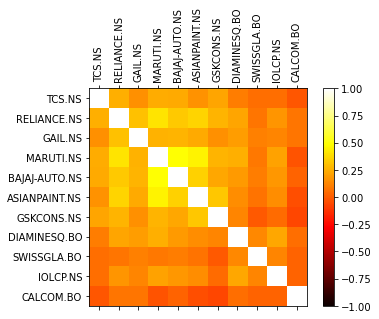

In [62]:
corr = percentage_change.corr()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='hot', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(my_stocks.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(my_stocks.columns)
ax.set_yticklabels(my_stocks.columns)
plt.show()

### Top Correlations among 11 stock closing prices
* Here we are taking the top 10 correlations between these 11 stocks

In [47]:
c = percentage_change.corr().abs()

s = c.unstack()
so = s.sort_values(ascending = False)
top_correlations_to_be_checked = 10
num = len(percentage_change.columns)
so[num: num + top_correlations_to_be_checked]

MARUTI.NS      BAJAJ-AUTO.NS    0.496856
BAJAJ-AUTO.NS  MARUTI.NS        0.496856
ASIANPAINT.NS  MARUTI.NS        0.455887
MARUTI.NS      ASIANPAINT.NS    0.455887
               RELIANCE.NS      0.410463
RELIANCE.NS    MARUTI.NS        0.410463
               ASIANPAINT.NS    0.360630
ASIANPAINT.NS  RELIANCE.NS      0.360630
BAJAJ-AUTO.NS  ASIANPAINT.NS    0.351691
ASIANPAINT.NS  BAJAJ-AUTO.NS    0.351691
dtype: float64

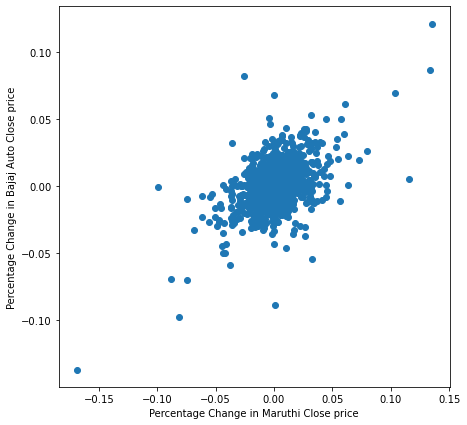

In [56]:
plt.figure(figsize = (7,7))
plt.scatter(x = percentage_change['MARUTI.NS'],
            y = percentage_change['BAJAJ-AUTO.NS'])
plt.xlabel('Percentage Change in Maruthi Close price')
plt.ylabel('Percentage Change in Bajaj Auto Close price')
plt.show()

* Here we observe that there is a positive correlation between closing price of maruthi and bajaj auto, it may also be that both are auto stocks, hence there is a slight correlation. 
* Let us plot the scatter_matrix to visualize possible correlations among 11 stocks.
* Kernel Density Estimate (KDE) is a fundamental data smoothing problem where inferences about the population are made, based on finite data sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAB5B981D0>,
      dtype=object)

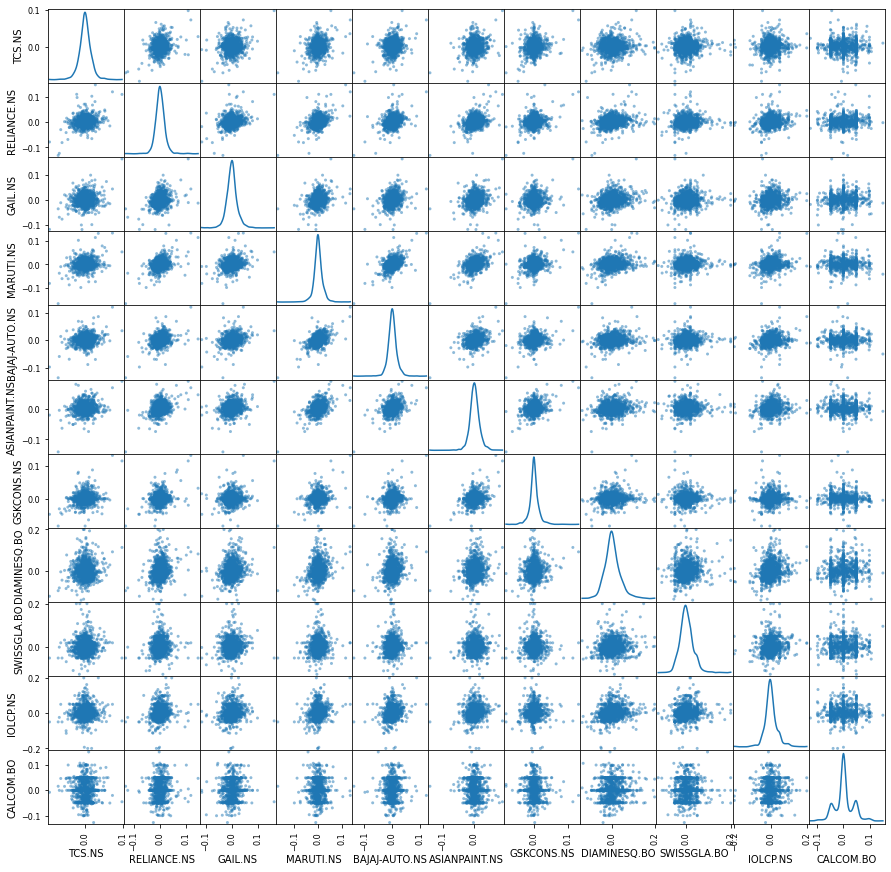

In [60]:
pd.plotting.scatter_matrix(frame = percentage_change,
                           diagonal = 'kde',
                           figsize = (15,15))

### Stocks Returns Rate and Risk

* Amongst 11 stocks, we will get the average of returns and standard deviation of returns for each of the stocks

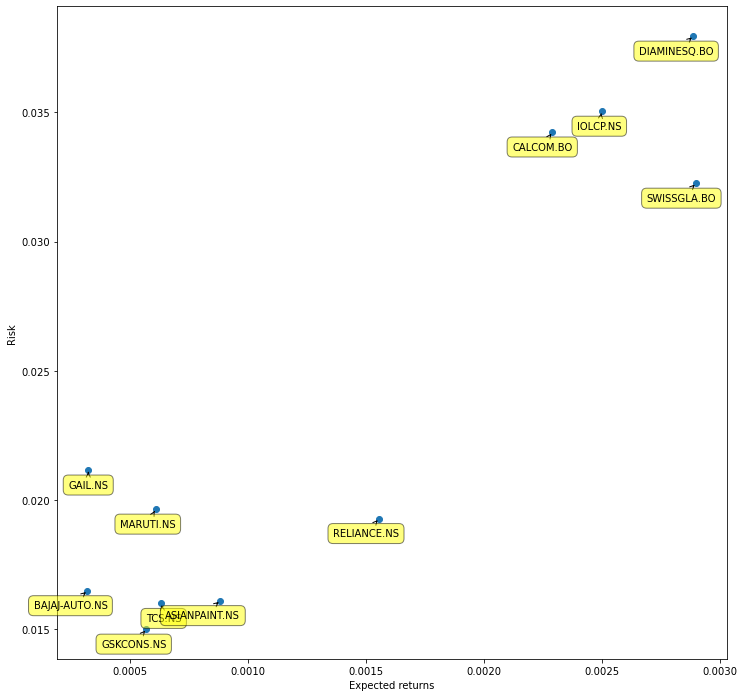

In [66]:
plt.figure(figsize = (12, 12))
plt.scatter(percentage_change.mean(), percentage_change.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(percentage_change.columns, percentage_change.mean(), percentage_change.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

* All the 11 stocks are giving positive return
* Stocks with highest expected returns are all small stocks, hence they may have given huge returns, but they are coming with high risk.
* The bottom left corner has some 6 stocks, which are giving low returns with less risk
* The standout amongst these stocks is 'Reliance', which is giving high returns with low risk

### Predicting stock price

##### Feature Engineering

We will use these three machine learning models to predict our stocks: Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN). But first, let us engineer some features: High Low Percentage and Percentage Change.

In [69]:
new_df_tcs = tcs_stock.loc[:,['Close', 'Volume']]
new_df_tcs['Intraday_high_low_percentage'] = (tcs_stock['High'] - tcs_stock['Low']) / tcs_stock['Close'] * 100
new_df_tcs['close_open_percentage'] = (tcs_stock['Close'] - tcs_stock['Open'])/tcs_stock['Open'] * 100
new_df_tcs

,Close,Volume,Intraday_high_low_percentage,close_open_percentage
2015-09-11 09:15:00,1276.00,1592672.0,1.089342,0.215983
2015-09-14 09:15:00,1275.82,1589318.0,0.862191,-0.520858
2015-09-15 09:15:00,1268.62,1379900.0,0.902556,-0.564343
2015-09-16 09:15:00,1275.18,1756816.0,0.938691,-0.181605
2015-09-18 09:15:00,1275.62,2455294.0,1.842241,-0.536452
...,...,...,...,...
2020-09-07 09:15:00,2327.05,4620401.0,2.584818,1.662298
2020-09-08 09:15:00,2348.20,7453998.0,2.699940,0.524412
2020-09-09 09:15:00,2327.65,3866535.0,1.675510,0.113978
2020-09-10 09:15:00,2331.15,2308813.0,1.038114,-0.164882


In [76]:
import math
from sklearn.preprocessing import scale

In [81]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(new_df_tcs)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Close'
new_df_tcs['label'] = new_df_tcs[forecast_col].shift(-forecast_out)
X = np.array(new_df_tcs.drop(['label'], 1))

# Scale the X this is similar to standardization
X = scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(new_df_tcs['label'])
y = y[:-forecast_out]

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 1)

In [89]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [93]:
# linear model
linear_model = LinearRegression()
linear_model.fit(X = X_train,
                 y = y_train)

# quadratic regression with 2 polynomials
poly_2 = make_pipeline(PolynomialFeatures(degree = 2), Ridge())
poly_2.fit(X_train,
           y_train)

# quadratic regression with 3 polynomials
poly_3 = make_pipeline(PolynomialFeatures(degree = 3), Ridge())
poly_3.fit(X_train,
           y_train)

# KNN regression
knn_model = KNeighborsRegressor(n_neighbors = 2)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [95]:
confidencereg = linear_model.score(X_test, y_test)
confidencepoly2 = poly_2.score(X_test,y_test)
confidencepoly3 = poly_3.score(X_test,y_test)
confidenceknn = knn_model.score(X_test, y_test)

# results
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.9636886078293707
The quadratic regression 2 confidence is  0.9609243251349107
The quadratic regression 3 confidence is  0.9635175733985823
The knn regression confidence is  0.9406051665938736


### Plot the predicted values

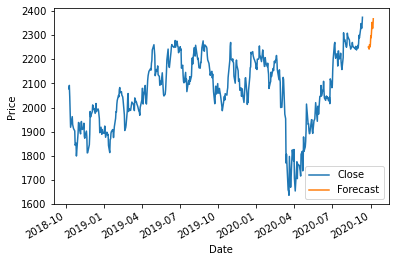

In [101]:
last_date = new_df_tcs.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

forecast_set = linear_model.predict(X_lately)
new_df_tcs['Forecast'] = np.nan
for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    new_df_tcs.loc[next_date] = [np.nan for _ in range(len(new_df_tcs.columns)-1)]+[i]
new_df_tcs['Close'].tail(500).plot()
new_df_tcs['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()